### Jupyter часть

- [V] Подготовка данных
  - Скачать известный датасет **Титаник** (train и test)
  - Загрузить их как `pandas.DataFrame`
  - Корректно конкатенировать их в один DataFrame по ключу `PassengerID`.
  Отсутствующие данные должны быть `Nan`. Все столбцы должны быть корректных типов, в частности, выживание, класс и пол должны быть категориальными
- [V] Анализ таблицы
  - Визуализировать базовую статистику таблицы. В каком классе было больше всего пассажиров?
  - Группировать таблицу в два уровня: класс и пол, по среднему значению возраста. Кто из возможных комбинаций самый юный, кто самый взрослый? Насколько отличаются эти значения?
  - Отобрать только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировать их по убыванию стоимости билета. Кто заплатил больше всех? Кто меньше всех?
  - Какое максимальное количество родных было с выжившим пассажиром?
- [V] Визуализация
  - Необходимо построить по данным таблицы 10 *различных* графиков на своё усмотрение и фантазию.
  Использовать можно любые средства, однако рекомендуется Seaborn и Plotly.
  - 5 графиков должно быть интерактивными
  - 1 график необходимо сделать 3D
  - Среди представленных графиков должны быть
    - [V] Scatter plot
    - [V] Linear plot (with several lines)
    - [V] Histogram
    - [V] Bar chart
    - [V] Horizontal bar chart
    - [V] Pie chart
    - [V] Box chart
    - [V] Sunburst chart

## Подготовка данных

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [10]:
np.random.seed(42)
test_indices = np.random.choice(train_df.index, size=200, replace=False)
test_df = train_df.loc[test_indices].copy()
train_df = train_df.drop(test_indices)
train_df['PassengerId'] = range(1, len(train_df) + 1)
test_df['PassengerId'] = range(len(train_df) + 1, len(train_df) + len(test_df) + 1)

In [12]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
combined_df['Survived'] = combined_df['Survived'].fillna(-1).astype('int').astype('category')
combined_df['Pclass'] = combined_df['Pclass'].astype('category')
combined_df['Sex'] = combined_df['Sex'].astype('category')

## Анализ данных

In [14]:
combined_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
887,888,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
888,889,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
889,890,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S


In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 65.8+ KB


In [21]:
combined_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### 3 класс имел самое большое количество

In [26]:
combined_df.groupby(['Pclass', 'Sex'], observed=True)['Age'].mean() 

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

- Самый юный: женщины 3 класса
- Самый взрослый: мужчины 1 класса
- Разница 19,53186

In [37]:
survived_k = combined_df[(combined_df['Survived'] == 1) & (combined_df['Name'].str.upper().str.startswith('K'))].copy()
survived_k.sort_values('Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
707,708,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
858,859,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
242,243,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
145,146,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
549,550,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
536,537,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
233,234,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
443,444,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
697,698,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q


- Заплатил больше всех Kimball, Mr. Edwin Nelson Jr
- Заплатил меньше всех Kelly, Miss. Anna Katherine "Annie Kate"

In [52]:
combined_df['Total_relatives'] = combined_df['SibSp'] + combined_df['Parch']
survived_k = combined_df[(combined_df['Survived'] == 1)]
survived_k.sort_values('Total_relatives', ascending=False)[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total_relatives
181,182,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,6
203,204,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,6
51,52,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,6
867,868,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,6
62,63,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,5


- Максимальное количество родных 6

## Визуализация

Scatter plot

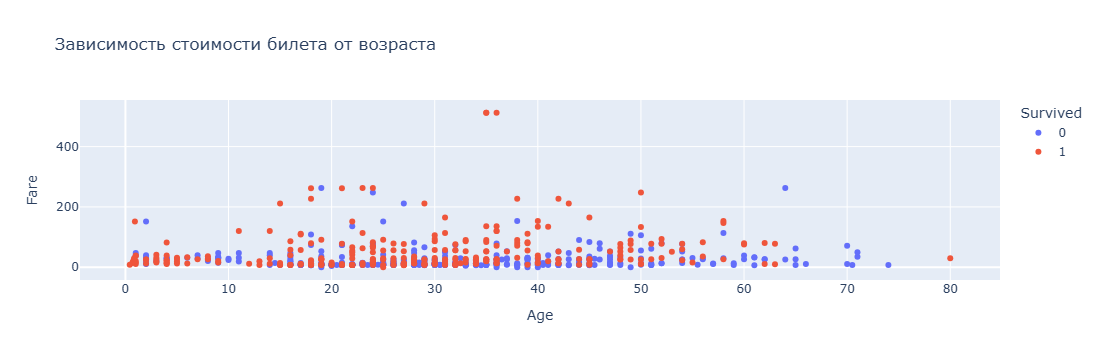

In [55]:
fig1 = px.scatter(combined_df.dropna(subset=['Age', 'Fare']), 
                 x='Age', y='Fare', color='Survived',
                 title='Зависимость стоимости билета от возраста',
                 hover_data=['Name', 'Pclass', 'Sex'])
fig1.show()

Linear Plot with Several Lines

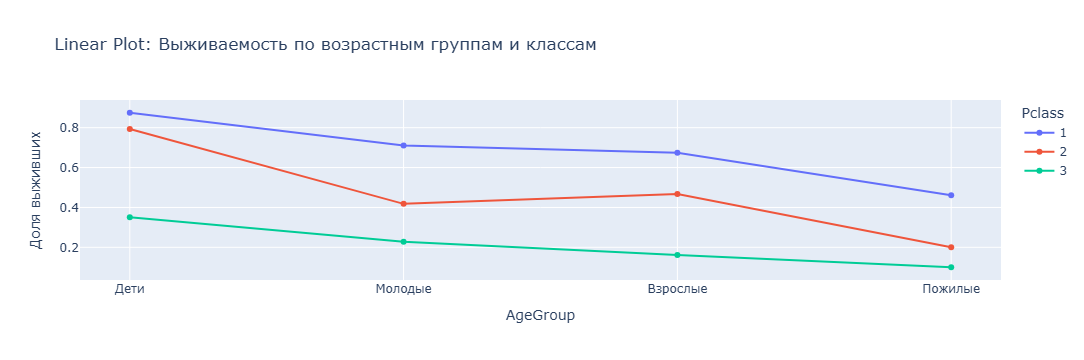

In [73]:
combined_df['AgeGroup'] = pd.cut(combined_df['Age'], bins=[0, 18, 30, 50, 100], 
                                labels=['Дети', 'Молодые', 'Взрослые', 'Пожилые'])

combined_df['Survived_numeric'] = combined_df['Survived'].astype('int')

survival_by_age_group = combined_df.groupby(['AgeGroup', 'Pclass'], observed=False)['Survived_numeric'].mean().reset_index()

fig2 = px.line(survival_by_age_group, x='AgeGroup', y='Survived_numeric', color='Pclass',
              title='Linear Plot: Выживаемость по возрастным группам и классам',
              labels={'Survived_numeric': 'Доля выживших'},
              markers=True)
fig2.show()

Histogram

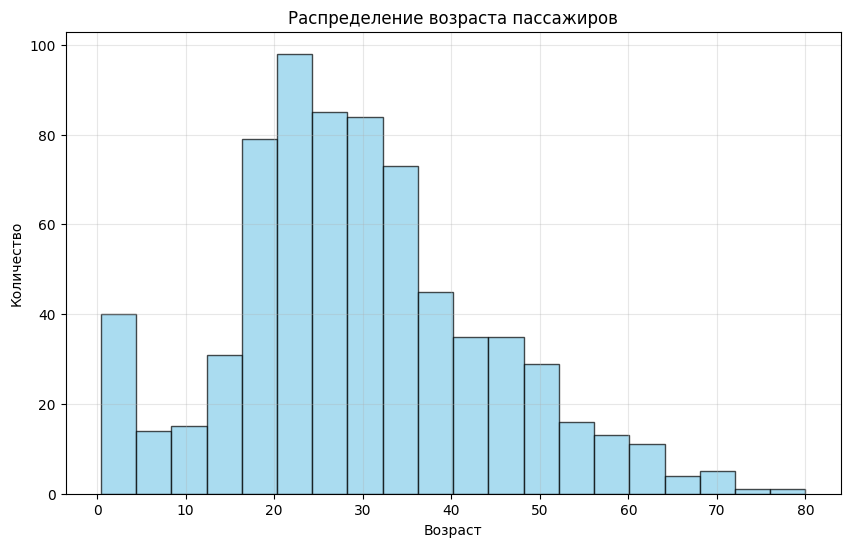

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(combined_df['Age'].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(alpha=0.3)
plt.show()

Bar Chart

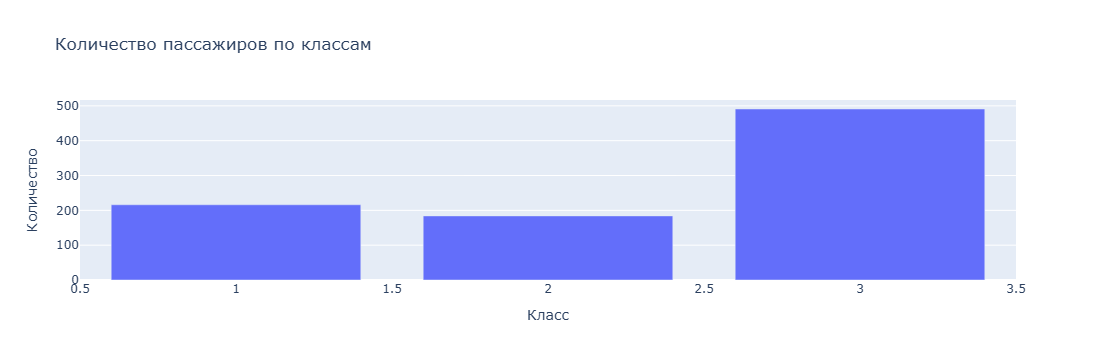

In [59]:
class_counts = combined_df['Pclass'].value_counts().reset_index()
fig4 = px.bar(class_counts, x='Pclass', y='count', 
             title='Количество пассажиров по классам',
             labels={'Pclass': 'Класс', 'count': 'Количество'})
fig4.show()

Horizontal Bar Chart

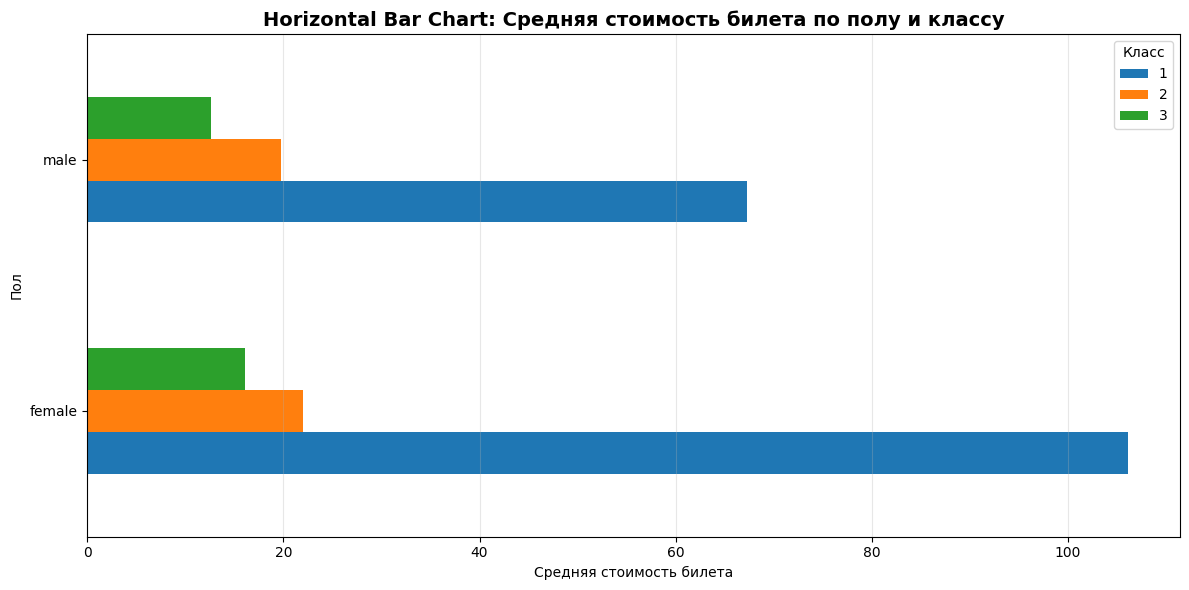

In [74]:
fare_by_sex_class = combined_df.groupby(['Sex', 'Pclass'], observed=False)['Fare'].mean().unstack()

plt.figure(figsize=(12, 6))
fare_by_sex_class.plot(kind='barh', ax=plt.gca())
plt.title('Horizontal Bar Chart: Средняя стоимость билета по полу и классу', fontsize=14, fontweight='bold')
plt.xlabel('Средняя стоимость билета')
plt.ylabel('Пол')
plt.legend(title='Класс')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Pie Chart

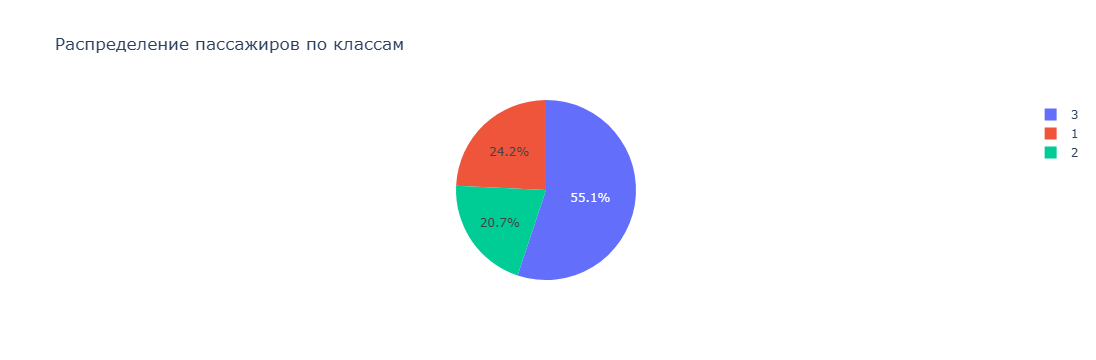

In [61]:
fig6 = px.pie(class_counts, values='count', names='Pclass', 
             title='Распределение пассажиров по классам')
fig6.show()

Box Chart

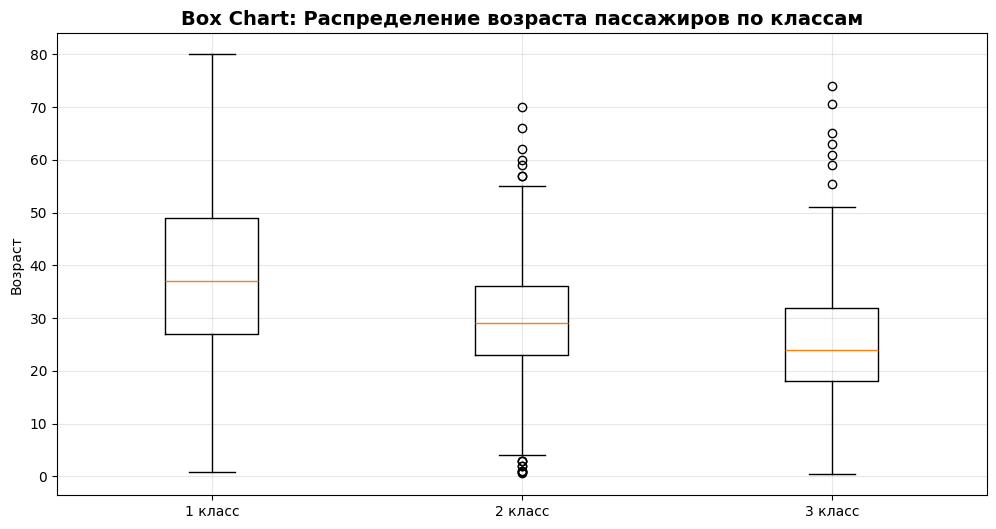

In [77]:
plt.figure(figsize=(12, 6))
box_data = [combined_df[combined_df['Pclass'] == i]['Age'].dropna() for i in [1, 2, 3]]
plt.boxplot(box_data, tick_labels=['1 класс', '2 класс', '3 класс'])
plt.title('Box Chart: Распределение возраста пассажиров по классам', fontsize=14, fontweight='bold')
plt.ylabel('Возраст')
plt.grid(alpha=0.3)
plt.show()

Sunburst Chart

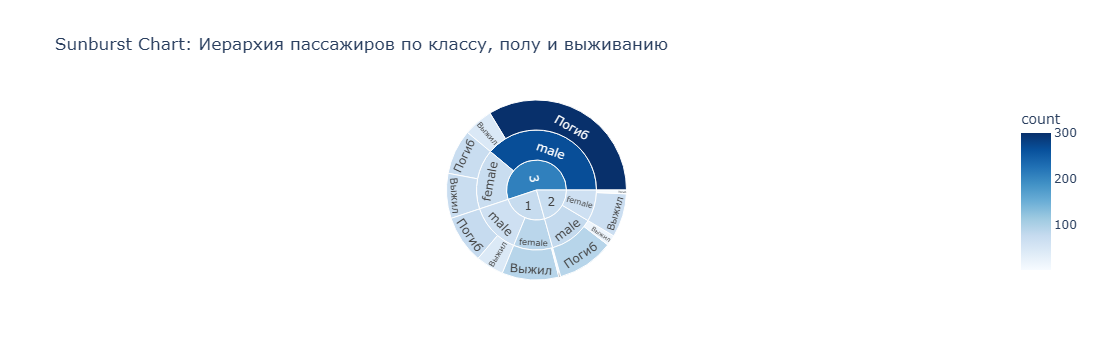

In [76]:
sunburst_data = combined_df.groupby(['Pclass', 'Sex', 'Survived'], observed=False).size().reset_index(name='count')
sunburst_data['Survived'] = sunburst_data['Survived'].map({0: 'Погиб', 1: 'Выжил'})

fig8 = px.sunburst(sunburst_data, path=['Pclass', 'Sex', 'Survived'], values='count',
                  title='Sunburst Chart: Иерархия пассажиров по классу, полу и выживанию',
                  color='count', color_continuous_scale='Blues')
fig8.show()

Heatmap

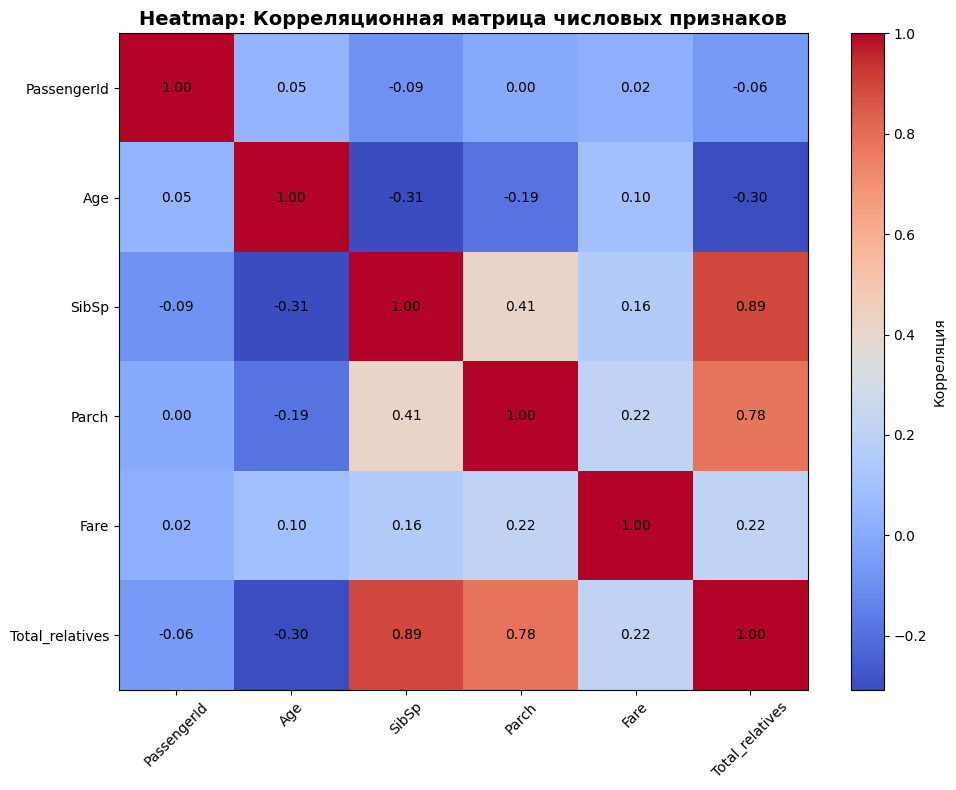

In [68]:
numeric_df = combined_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Корреляция')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Heatmap: Корреляционная матрица числовых признаков', fontsize=14, fontweight='bold')

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

3D Scatter Plot

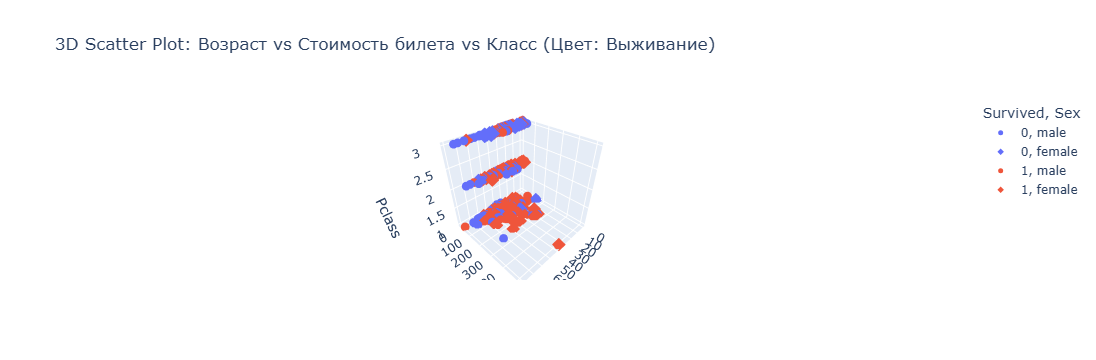

In [69]:
fig9 = px.scatter_3d(combined_df.dropna(subset=['Age', 'Fare', 'Pclass']),
                    x='Age', y='Fare', z='Pclass',
                    color='Survived', 
                    title='3D Scatter Plot: Возраст vs Стоимость билета vs Класс (Цвет: Выживание)',
                    hover_data=['Name', 'Sex'],
                    symbol='Sex')
fig9.update_traces(marker=dict(size=5))
fig9.show()